In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [50]:
X_train_l = np.random.randint(0,8, size=(10000))
X_train_r = np.random.randint(0,8, size=(10000))

In [3]:
X1 = tf.placeholder(shape=[None], dtype=tf.int32)
Y1 = tf.placeholder(shape=[None], dtype=tf.int32)
X2 = tf.placeholder(shape=[None], dtype=tf.int32)
Y2 = tf.placeholder(shape=[None], dtype=tf.int32)

In [13]:
with tf.variable_scope("model"):
    Wfl1 = tf.get_variable(name="for1w", initializer=tf.random_normal([8,3]) )
    bfl1 = tf.get_variable(name="for1b", initializer=tf.random_normal([3]) )
    Wfl2 = tf.get_variable(name="for2w", initializer=tf.random_normal([3,8]) )
    bfl2 = tf.get_variable(name="for2b", initializer=tf.random_normal([8]) )

with tf.variable_scope("model", reuse=True):
    Wfr1 = tf.get_variable(name="for1w")
    bfr1 = tf.get_variable(name="for1b")
    Wfr2 = tf.get_variable(name="for2w")
    bfr2 = tf.get_variable(name="for2b")

In [34]:
X_oh_1 = tf.one_hot(X1, depth=8)
X_oh_2 = tf.one_hot(X2, depth=8)

emb1 = tf.nn.xw_plus_b(X_oh_1, Wfl1, bfl1)
emb2 = tf.nn.xw_plus_b(X_oh_2, Wfr1, bfr1)

out1 = tf.nn.xw_plus_b(emb1, Wfl2, bfl2)
out2 = tf.nn.xw_plus_b(emb2, Wfr2, bfr2)

loss_l = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=out1, labels=Y1)
loss_r = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=out2, labels=Y2)

cos = int(not( (X1 <=4) == (X2<=4)))*1 - tf.matmul(emb1, tf.transpose(emb2)) / (tf.norm(emb1) * tf.norm(emb2))

train_step = tf.train.AdamOptimizer(1e-4).minimize(loss_l + loss_r + cos)


In [47]:
batch_size = 100
num_step = int(10000/batch_size)
sess = tf.Session()

In [51]:
sess.run(tf.global_variables_initializer())
for i in range(1000):
    np.random.shuffle(X_train_l)
    np.random.shuffle(X_train_r)
    for j in range(num_step):
        train_step.run(session=sess, feed_dict={X1: X_train_l[j*100:(j+1)*100], X2: X_train_r[j*100:(j+1)*100], Y1:X_train_l[j*100:(j+1)*100], Y2:X_train_r[j*100:(j+1)*100]})

In [56]:

output = emb1.eval(session=sess, feed_dict={X1:np.asarray([0,1,2,3,4,5,6,7])})
output

In [63]:
colors = ['green', 'green', 'green', 'green', 'red', 'red','red', 'red']

In [58]:
output = emb1.eval(session=sess, feed_dict={X1:np.asarray([0,1,2,3,4,5,6,7])})
print(output)

[[  9.08053684  12.29229736   1.47352552]
 [  8.46389008  10.98991394   6.17677021]
 [  5.60169792  14.51283455   4.14838457]
 [  5.32884073  13.34788513   1.395509  ]
 [  7.88456249  14.05049992   5.70275402]
 [  9.74036121  12.58763027   4.21694851]
 [  5.11827517  12.39102554   6.33042049]
 [  8.04978371  14.63461399   3.09493732]]


In [89]:
for i in range(output.shape[0]):
    asm = np.sum(output[i])
    output[i] = output[i] - (asm/3.0)

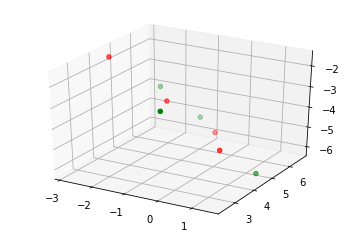

In [90]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter( xs=output[:,0], ys=output[:,1], zs=output[:,2], c=colors)

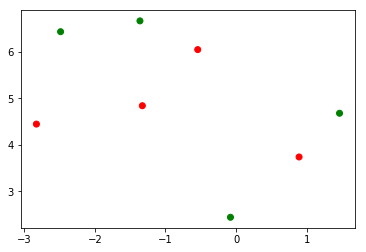

In [92]:
plt.scatter( x=output[:,0], y=output[:,1],  c=colors)

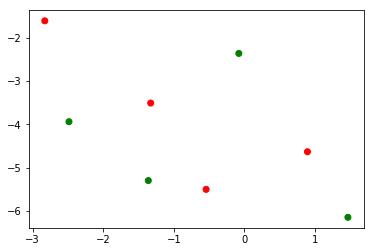

In [95]:
plt.scatter(x=output[:,0], y=output[:,2], c=colors)

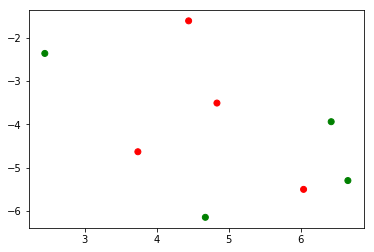

In [97]:
plt.scatter( x=output[:,1], y=output[:,2], c=colors)

In [ ]:
sess.close()